In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import logging
from pathlib import Path

import numpy as np
import numpyro

from hb_mep.config import HBMepConfig
from hb_mep.data_access import DataClass
from hb_mep.utils import plot

numpyro.set_platform('cpu')
numpyro.set_host_device_count(4)
numpyro.enable_x64()

PARENT_PATH = Path(os.getcwd()).parent.parent.absolute()
FORMAT = "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
logging.basicConfig(format=FORMAT, level=logging.INFO)

#### Load config

In [3]:
config = HBMepConfig()
config.CURRENT_PATH = PARENT_PATH

data = DataClass(config)

#### Simulate data and preprocess

In [4]:
df, a, a_mean = data.simulate(random_seed=29, n_participant=10, n_segment=3, sparse_factor=0.0)

df, encoder_dict = data.build(df)

2023-04-16 14:36:29,039 - jax._src.xla_bridge - INFO - Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
2023-04-16 14:36:29,040 - jax._src.xla_bridge - INFO - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-04-16 14:36:29,041 - jax._src.xla_bridge - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-04-16 14:36:29,042 - jax._src.xla_bridge - INFO - Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023-04-16 14:36:29,043 - jax._src.xla_bridge - INFO - Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
2023-04-16 14:36:29,092 - hb_mep.data_access.core - INFO - Random seed: 29
2023-04-16 14:36:29,093 

#### Plot simulated data

2023-04-16 14:36:32,908 - hb_mep.utils.utils - INFO - func:plot took: 1.27 sec


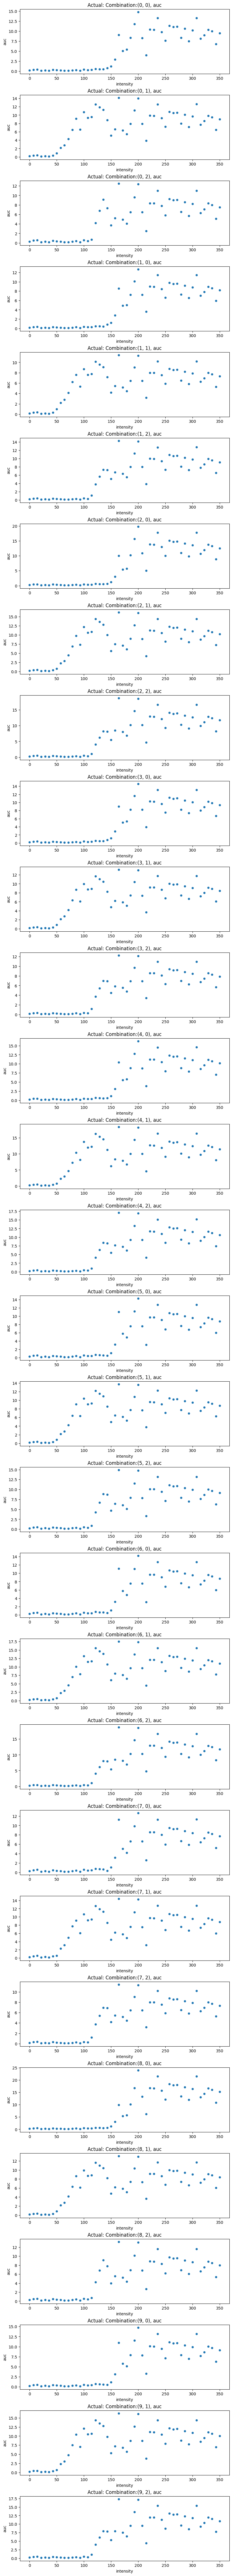

In [5]:
plot(df);

In [8]:
hb = SaturatedReLU_HB(config)
mcmc_hb, posterior_samples_hb = hb.sample(df=df)

2023-04-12 13:23:56,938 - hb_mep.models.baseline - INFO - Running inference with model Saturated_ReLU_HB...


  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

2023-04-12 13:27:09,690 - hb_mep.utils.utils - INFO - func:sample took: 3 min and 12.76 sec


In [9]:
# mcmc_hb.print_summary()

In [10]:
hb_error = np.abs(posterior_samples_hb["a"].mean(axis=0).reshape(-1,) - a.reshape(-1,)).sum()
hb_error

9.357109570128852

In [11]:
# hb.plot_fit(df=df, posterior_samples=posterior_samples_hb);

In [12]:
nhb = SaturatedReLU_NHB(config)
mcmc_nhb, posterior_samples_nhb = nhb.sample(df=df)

2023-04-12 13:27:10,722 - hb_mep.models.baseline - INFO - Running inference with model Saturated_ReLU_NHB...


  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

2023-04-12 13:34:46,856 - hb_mep.utils.utils - INFO - func:sample took: 7 min and 36.14 sec


In [13]:
# mcmc_nhb.print_summary()

In [14]:
# nhb.plot_fit(df=df, posterior_samples=posterior_samples_nhb);

In [15]:
nhb_error = np.abs(posterior_samples_nhb["a"].mean(axis=0).reshape(-1,) - a.reshape(-1,)).sum()
nhb_error

18.714569047069947

In [16]:
mle = SaturatedReLU_MLE(config)
mcmc_mle, posterior_samples_mle = mle.sample(df=df)

2023-04-12 13:34:47,958 - hb_mep.models.baseline - INFO - Running inference with model Saturated_ReLU_MLE...


  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

2023-04-12 13:38:21,639 - hb_mep.utils.utils - INFO - func:sample took: 3 min and 33.68 sec


In [17]:
mle_error = np.abs(posterior_samples_mle["a"].mean(axis=0).reshape(-1,) - a.reshape(-1,)).sum()
mle_error

7.753246721515829

In [18]:
nhb_error - hb_error

9.357459476941095

In [19]:
mle_error - hb_error

-1.6038628486130229

In [20]:
mle_error - nhb_error

-10.961322325554118